<a href="https://colab.research.google.com/github/RajuMopidevi/CapStoneSimpliLearn/blob/main/Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,mean_squared_error, mean_absolute_error, r2_score

In [ ]:
from google.colab import files

In [ ]:
Hospital =  pd.read_csv('https://raw.githubusercontent.com/RajuMopidevi/Machine-Learning-and-Artificial-Intelligence/main/01-01_EDA/Hospitalisation%20details.csv')
Medical = pd.read_csv('https://raw.githubusercontent.com/RajuMopidevi/Machine-Learning-and-Artificial-Intelligence/main/01-01_EDA/Medical%20Examinations.csv')
Names = pd.read_csv('https://raw.githubusercontent.com/RajuMopidevi/Machine-Learning-and-Artificial-Intelligence/main/01-01_EDA/Names.csv')


In [ ]:
Hospital.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013


In [ ]:
Medical.head()

,Customer ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker
0,Id1,47.410,7.47,No,No,No,No major surgery,yes
1,Id2,30.360,5.77,No,No,No,No major surgery,yes
2,Id3,34.485,11.87,yes,No,No,2,yes
3,Id4,38.095,6.05,No,No,No,No major surgery,yes
4,Id5,35.530,5.45,No,No,No,No major surgery,yes


In [ ]:
Names.head()

,Customer ID,name
0,Id1,"Hawks, Ms. Kelly"
1,Id2,"Lehner, Mr. Matthew D"
2,Id3,"Lu, Mr. Phil"
3,Id4,"Osborne, Ms. Kelsey"
4,Id5,"Kadala, Ms. Kristyn"


In [ ]:
#1. Merging all three files using inner merge
MP = pd.merge(Hospital, Medical, on='Customer ID', how ='inner')
HP = pd.merge(MP, Names, on='Customer ID', how ='inner')

In [ ]:
HP.head()

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.58,4.51,No,No,No,1,No,"German, Mr. Aaron K"
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.60,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P"
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.47,6.35,No,No,Yes,1,No,"Albano, Ms. Julie"
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.70,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr."
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.34,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan"


In [ ]:
HP.describe()

,date,children,charges,BMI,HBA1C
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000
mean,15.563597,1.025696,13529.918034,30.972649,6.578998
std,8.720508,1.234754,11898.654299,8.742095,2.228731
min,1.000000,0.000000,563.840000,15.010000,4.000000
25%,8.000000,0.000000,5084.010000,24.600000,4.900000
50%,15.000000,0.000000,9630.910000,30.400000,5.810000
75%,23.000000,2.000000,16912.295000,36.300000,7.955000
max,30.000000,5.000000,63770.430000,55.050000,12.000000


In [ ]:
HP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2335 non-null   object 
 1   year                    2335 non-null   object 
 2   month                   2335 non-null   object 
 3   date                    2335 non-null   int64  
 4   children                2335 non-null   int64  
 5   charges                 2335 non-null   float64
 6   Hospital tier           2335 non-null   object 
 7   City tier               2335 non-null   object 
 8   State ID                2335 non-null   object 
 9   BMI                     2335 non-null   float64
 10  HBA1C                   2335 non-null   float64
 11  Heart Issues            2335 non-null   object 
 12  Any Transplants         2335 non-null   object 
 13  Cancer history          2335 non-null   object 
 14  NumberOfMajorSurgeries  2335 non-null   

In [ ]:
# 2. missing values
HP.isna().sum()

,0
Customer ID,0
year,0
month,0
date,0
children,0
charges,0
Hospital tier,0
City tier,0
State ID,0
BMI,0


In [ ]:
HP

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.580,4.51,No,No,No,1,No,"German, Mr. Aaron K"
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.600,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P"
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.470,6.35,No,No,Yes,1,No,"Albano, Ms. Julie"
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.700,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr."
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.340,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,Id5,1989,Jun,19,0,55135.40,tier - 1,tier - 2,R1012,35.530,5.45,No,No,No,No major surgery,yes,"Kadala, Ms. Kristyn"
2331,Id4,1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024,38.095,6.05,No,No,No,No major surgery,yes,"Osborne, Ms. Kelsey"
2332,Id3,1970,?,11,3,60021.40,tier - 1,tier - 1,R1012,34.485,11.87,yes,No,No,2,yes,"Lu, Mr. Phil"
2333,Id2,1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013,30.360,5.77,No,No,No,No major surgery,yes,"Lehner, Mr. Matthew D"


In [ ]:
# 3. find the rows that have question mark symbol and drop the rows
HPD = HP.drop(HP[HP.isin(['?']).any(axis=1)].index)

In [ ]:
HPD

,Customer ID,year,month,date,children,charges,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,name
0,Id2335,1992,Jul,9,0,563.84,tier - 2,tier - 3,R1013,17.580,4.51,No,No,No,1,No,"German, Mr. Aaron K"
1,Id2334,1992,Nov,30,0,570.62,tier - 2,tier - 1,R1013,17.600,4.39,No,No,No,1,No,"Rosendahl, Mr. Evan P"
2,Id2333,1993,Jun,30,0,600.00,tier - 2,tier - 1,R1013,16.470,6.35,No,No,Yes,1,No,"Albano, Ms. Julie"
3,Id2332,1992,Sep,13,0,604.54,tier - 3,tier - 3,R1013,17.700,6.28,No,No,No,1,No,"Riveros Gonzalez, Mr. Juan D. Sr."
4,Id2331,1998,Jul,27,0,637.26,tier - 3,tier - 3,R1013,22.340,5.57,No,No,No,1,No,"Brietzke, Mr. Jordan"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2329,Id6,1962,Aug,4,0,52590.83,tier - 1,tier - 3,R1011,32.800,6.59,No,No,No,No major surgery,yes,"Baker, Mr. Russell B."
2330,Id5,1989,Jun,19,0,55135.40,tier - 1,tier - 2,R1012,35.530,5.45,No,No,No,No major surgery,yes,"Kadala, Ms. Kristyn"
2331,Id4,1991,Jun,6,1,58571.07,tier - 1,tier - 3,R1024,38.095,6.05,No,No,No,No major surgery,yes,"Osborne, Ms. Kelsey"
2333,Id2,1977,Jun,8,0,62592.87,tier - 2,tier - 3,R1013,30.360,5.77,No,No,No,No major surgery,yes,"Lehner, Mr. Matthew D"


In [ ]:
# 4. use necessary transformation methods to deal with nominal amd ordinal categorical data
HPD['year'] = HPD['year'].astype(int)
HPD['month'] = HPD['month'].astype(str)

# Slicing for state
HPD['State ID'] = HPD['State ID'].astype(str)
HPD['State ID'] = HPD['State ID'].str[1:5]

# Handle empty strings (replace with a placeholder or drop those rows)
HPD['State ID'] = HPD['State ID'].replace('', -1) # Replace empty strings with -1
HPD['State ID'] = HPD['State ID'].astype(int) # Now convert to int

# 5. replace no major surgery with 0
HPD['NumberOfMajorSurgeries'] = HPD['NumberOfMajorSurgeries'].replace('No major surgery', 0)
HPD['NumberOfMajorSurgeries'] = HPD['NumberOfMajorSurgeries'].astype(int)

# replace YES with 1 & NO with 0
HPD['Heart Issues'] = HPD['Heart Issues'].replace('No', 0)
HPD['Heart Issues'] = HPD['Heart Issues'].replace('yes', 1)
HPD['Any Transplants'] = HPD['Any Transplants'].replace('No', 0)
HPD['Any Transplants'] = HPD['Any Transplants'].replace('yes', 1)
HPD['Cancer history'] = HPD['Cancer history'].replace('No', 0)
HPD['Cancer history'] = HPD['Cancer history'].replace('Yes', 1)
HPD['smoker'] = HPD['smoker'].replace('No', 0)
HPD['smoker'] = HPD['smoker'].replace('yes', 1)

HPD['Heart Issues'] = HPD['Heart Issues'].astype(int)
HPD['Any Transplants'] = HPD['Any Transplants'].astype(int)
HPD['Cancer history'] = HPD['Cancer history'].astype(int)
HPD['NumberOfMajorSurgeries'] = HPD['NumberOfMajorSurgeries'].astype(int)
HPD['smoker'] = HPD['smoker'].astype(int)
HPD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2325 entries, 0 to 2334
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2325 non-null   object 
 1   year                    2325 non-null   int64  
 2   month                   2325 non-null   object 
 3   date                    2325 non-null   int64  
 4   children                2325 non-null   int64  
 5   charges                 2325 non-null   float64
 6   Hospital tier           2325 non-null   object 
 7   City tier               2325 non-null   object 
 8   State ID                2325 non-null   int64  
 9   BMI                     2325 non-null   float64
 10  HBA1C                   2325 non-null   float64
 11  Heart Issues            2325 non-null   int64  
 12  Any Transplants         2325 non-null   int64  
 13  Cancer history          2325 non-null   int64  
 14  NumberOfMajorSurgeries  2325 non-null   int64

In [ ]:
# remove 'tier - ' from Hospital tier column
HPD['Hospital tier'] = HPD['Hospital tier'].str.replace('tier - ', '')
HPD['Hospital tier'] = HPD['Hospital tier'].astype(int)

In [ ]:
# remove 'tier - ' from Hospital tier column
HPD['City tier'] = HPD['City tier'].str.replace('tier - ', '')
HPD['City tier'] = HPD['City tier'].astype(int)

In [ ]:
HPD.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2325 entries, 0 to 2334
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2325 non-null   object 
 1   year                    2325 non-null   int64  
 2   month                   2325 non-null   object 
 3   date                    2325 non-null   int64  
 4   children                2325 non-null   int64  
 5   charges                 2325 non-null   float64
 6   Hospital tier           2325 non-null   int64  
 7   City tier               2325 non-null   int64  
 8   State ID                2325 non-null   int64  
 9   BMI                     2325 non-null   float64
 10  HBA1C                   2325 non-null   float64
 11  Heart Issues            2325 non-null   int64  
 12  Any Transplants         2325 non-null   int64  
 13  Cancer history          2325 non-null   int64  
 14  NumberOfMajorSurgeries  2325 non-null   int64

In [ ]:
# 7.Ageappears to be a significant factor in this analysis. Calculate the patients' ages based on their dates of birth.
# a. get date of birth from the year, date and month columns
HPD['Date of Birth'] = pd.to_datetime(HPD['date'].astype(str) + '-' + HPD['month'].astype(str) + '-' + HPD['year'].astype(str))
#b. arrive current age from the date of birth and todays date
HPD['Age'] = (pd.to_datetime('today').year - HPD['Date of Birth'].dt.year)

In [ ]:
# 8. Gender of the pateient from the salutation of names like "exRiveros Gonzalez, Mr.  Juan D. Sr." and "Graves - Rostro, Ms.  Lindy" etc..
HPD['Gender'] = HPD['name'].str.contains('Mr.')
HPD['Gender'] = HPD['Gender'].replace(True, 'Male')
HPD['Gender'] = HPD['Gender'].replace(False, 'Female')
HPD['Gender'] = HPD['Gender'].replace('Male', 1)
HPD['Gender'] = HPD['Gender'].replace('Female',0)

In [ ]:
# downloading dataset

#HPD.to_csv('merged_dataset.csv', index=False)
#  files.download('merged_dataset.csv')

Text(0, 0.5, 'Frequency')

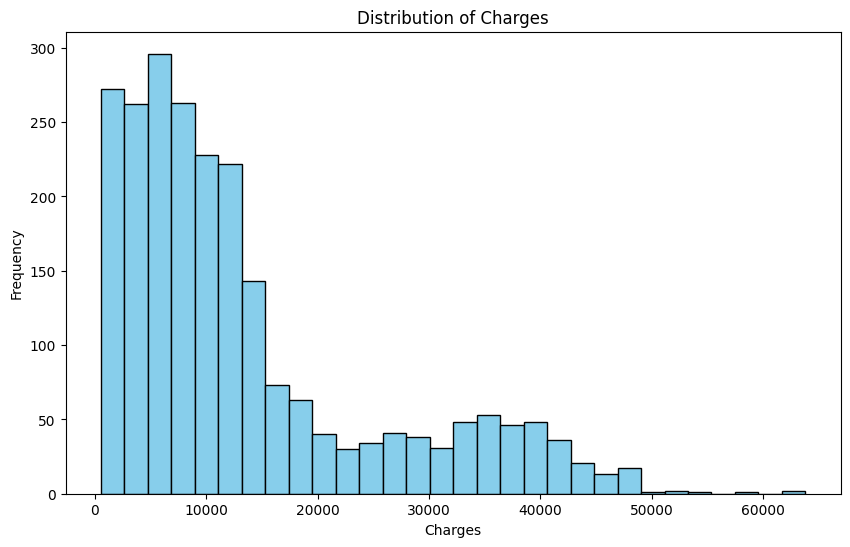

In [ ]:
# 9. Visualization of the distribution of costs using a histogram
plt.figure(figsize=(10, 6))
plt.hist(HPD['charges'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')


Text(0.5, 0, 'Charges')

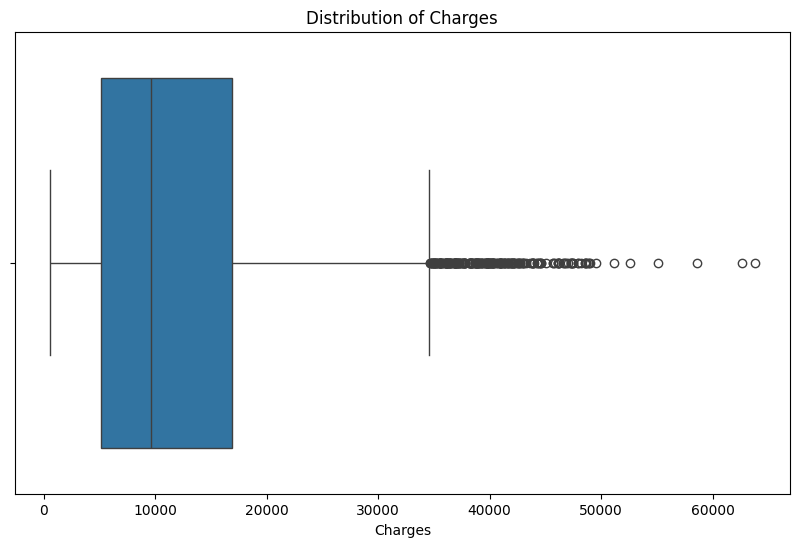

In [ ]:
# 9b. Visualization of the distribution of costs using a Box plt
plt.figure(figsize=(10, 6))
sns.boxplot(x=HPD['charges'])
plt.title('Distribution of Charges')
plt.xlabel('Charges')



Text(0.5, 0, 'Charges')

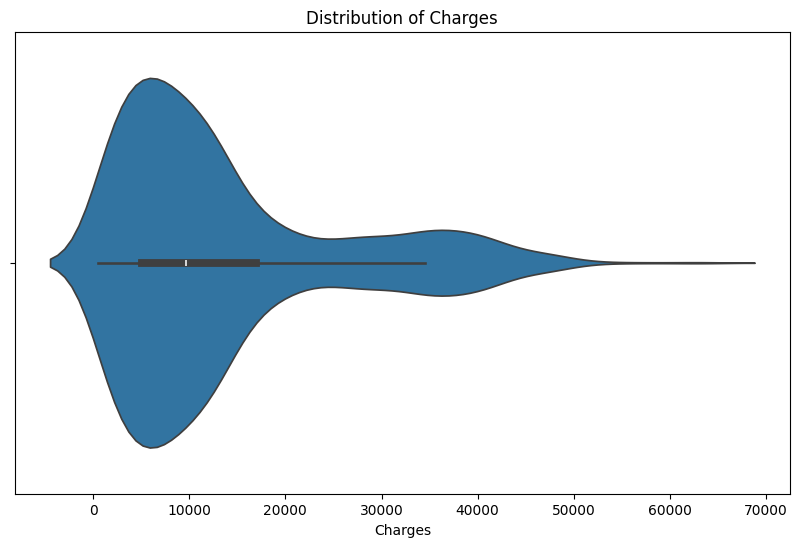

In [ ]:
# 9c. Visualization of the distribution of costs using a whisker plt
plt.figure(figsize=(10, 6))
sns.violinplot(x=HPD['charges'])
plt.title('Distribution of Charges')
plt.xlabel('Charges')

Text(0.5, 36.72222222222221, 'Charges')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


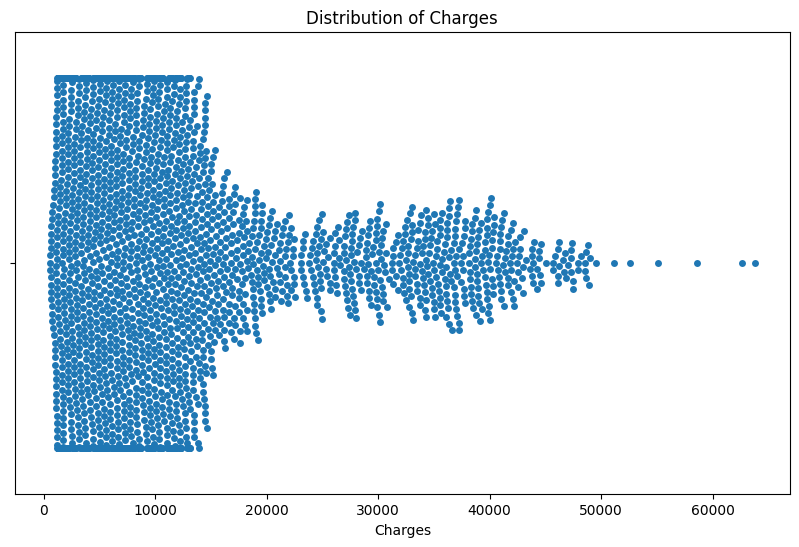

In [ ]:
# 9d. Visualization of the distribution of costs using a swarm plt
plt.figure(figsize=(10, 6))
sns.swarmplot(x=HPD['charges'])
plt.title('Distribution of Charges')
plt.xlabel('Charges')


Text(0.5, 1.0, 'Distribution of Charges by Gender and Hospital Tier')

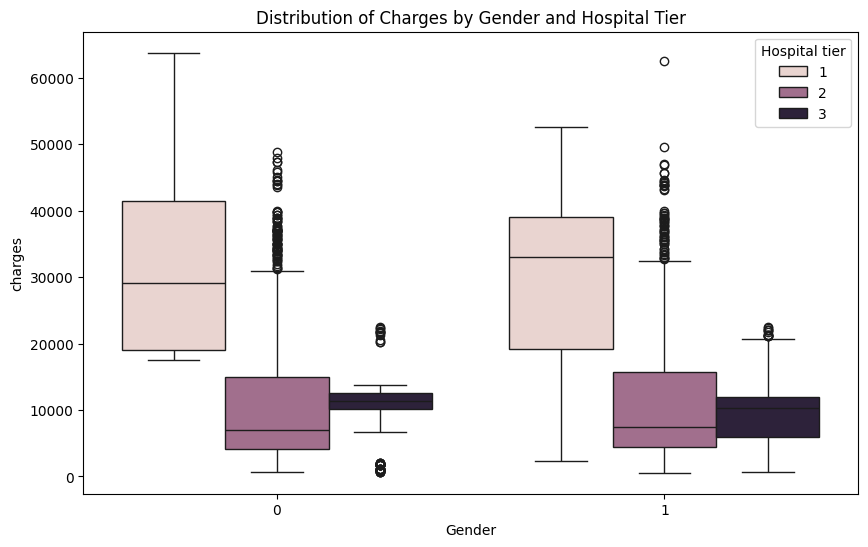

In [ ]:
# 10. State how the distribution is different across gender and tiers of hospitals.
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='charges', hue='Hospital tier', data=HPD)
plt.title('Distribution of Charges by Gender and Hospital Tier')

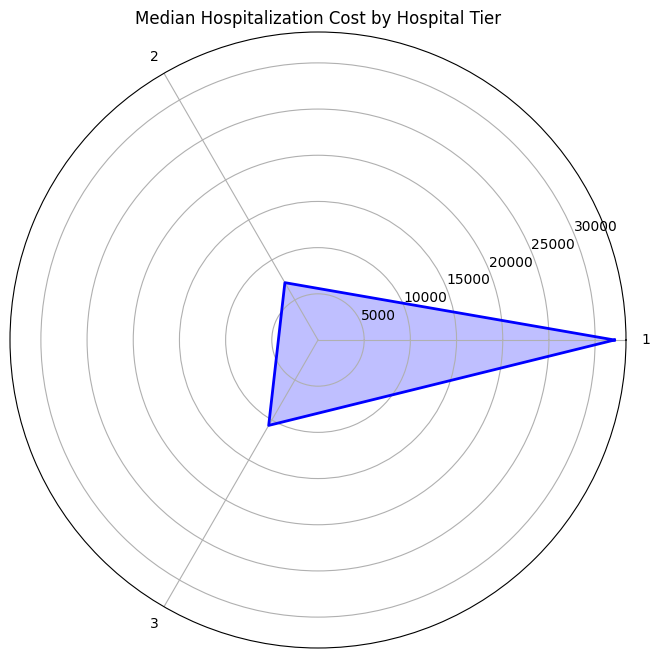

In [ ]:
# 11. Radar chart to showcase the median hospitalization cost for each tier of hospitals using
Median_Charges = HPD.groupby('Hospital tier')['charges'].median()
categories = list(Median_Charges.index)
values = list(Median_Charges.values)
fig, ax = plt.subplots(figsize=(8,8),subplot_kw=dict(polar=True))
num_vars = len(categories)
angles = np.linspace(0, 2 * np.pi,num_vars, endpoint=False).tolist()
values += values[:1]
angles += angles[:1]

ax.fill(angles, values, color='b',alpha=0.25)
ax.plot(angles, values, color='b',linewidth=2)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

plt.title('Median Hospitalization Cost by Hospital Tier')
plt.show()


In [ ]:
#12. A frequency table and a stacked bar chart to visualize the count of people in the different tiers of cities and hospitals
# 12a. get the count of people (customer ID) in the different tiers of cities and hospitals using groupby function
HPD_count = HPD.groupby(['City tier','Hospital tier']).count()['Customer ID']
HPD_count


City tier  Hospital tier
1          1                 85
           2                403
           3                241
2          1                106
           2                479
           3                222
3          1                109
           2                452
           3                228
Name: Customer ID, dtype: int64

Text(0, 0.5, 'Count')

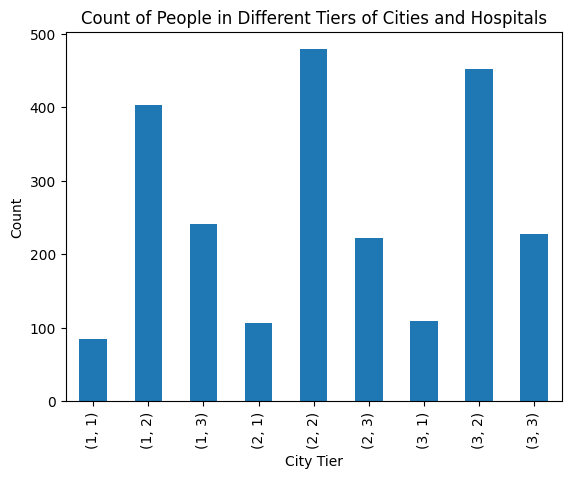

In [ ]:
# 12b. stacked bar chart using HPD_Count
HPD_count.plot(kind='bar', stacked=True)
plt.title('Count of People in Different Tiers of Cities and Hospitals')
plt.xlabel('City Tier')
plt.ylabel('Count')


In [ ]:
# 13a null Hypothesis: The average hospitalization costs for the three types of hospitals are not significantly different
n_hospital_1 = HPD[HPD['Hospital tier'] == 1]['charges']
n_hospital_2 = HPD[HPD['Hospital tier'] == 2]['charges']
n_hospital_3 = HPD[HPD['Hospital tier'] == 3]['charges']

anova_result = stats.f_oneway(n_hospital_1, n_hospital_2, n_hospital_3)
print(anova_result)
if anova_result.pvalue < 0.05:
  print('The average hospitalization costs for the three types of hospitals are significantly different')
else:
  print('The average hospitalization costs for the three types of hospitals are not significantly different')



F_onewayResult(statistic=493.98956631117636, pvalue=1.7738221310852664e-179)
The average hospitalization costs for the three types of hospitals are significantly different


In [ ]:
# 13b null Hypothesis: The average hospitalization costs for the three types of cities are not significantly different
n_city_1 = HPD[HPD['City tier'] == 1]['charges']
n_city_2 = HPD[HPD['City tier'] == 2]['charges']
n_city_3 = HPD[HPD['City tier'] == 3]['charges']

anova_result = stats.f_oneway(n_city_1, n_city_2, n_city_3)
print(anova_result)
if anova_result.pvalue < 0.05:
  print('The average hospitalization costs for the three types of cities are significantly different')
else:
  print('The average hospitalization costs for the three types of cities are not significantly different')

F_onewayResult(statistic=1.4543557561814688, pvalue=0.23376344386881315)
The average hospitalization costs for the three types of cities are not significantly different


In [ ]:
# 13c null Hypothesis: The average hospitalization cost for smokers is not significantly different from the average cost for nonsmokers.
n_smoker = HPD[HPD['smoker'] == 1]['charges']
n_nonsmoker = HPD[HPD['smoker'] == 0]['charges']

#t-test
t_result = stats.ttest_ind(n_smoker, n_nonsmoker)
print(t_result)
if t_result.pvalue < 0.05:
  print('The average hospitalization cost for smokers is significantly different from the average cost for nonsmokers')
else:
  print('The average hospitalization cost for smokers is not significantly different from the average cost for nonsmokers')

TtestResult(statistic=74.15560699695726, pvalue=0.0, df=2323.0)
The average hospitalization cost for smokers is significantly different from the average cost for nonsmokers


In [ ]:
#13d. Smoking and heart issues are independent
n_smoker = HPD[HPD['smoker'] == 1]['Heart Issues']
n_nonsmoker = HPD[HPD['smoker'] == 0]['Heart Issues']

#chi-square test
chi_result = stats.chi2_contingency(pd.crosstab(HPD['smoker'], HPD['Heart Issues']))
print(chi_result)
if chi_result[1] < 0.05:
  print('Smoking and heart issues are not independent')
else:
  print('Smoking and heart issues are independent')


Chi2ContingencyResult(statistic=0.08588150449910657, pvalue=0.7694797581780767, dof=1, expected_freq=array([[1111.30967742,  727.69032258],
       [ 293.69032258,  192.30967742]]))
Smoking and heart issues are independent


## 2. MACHINE LEARNING

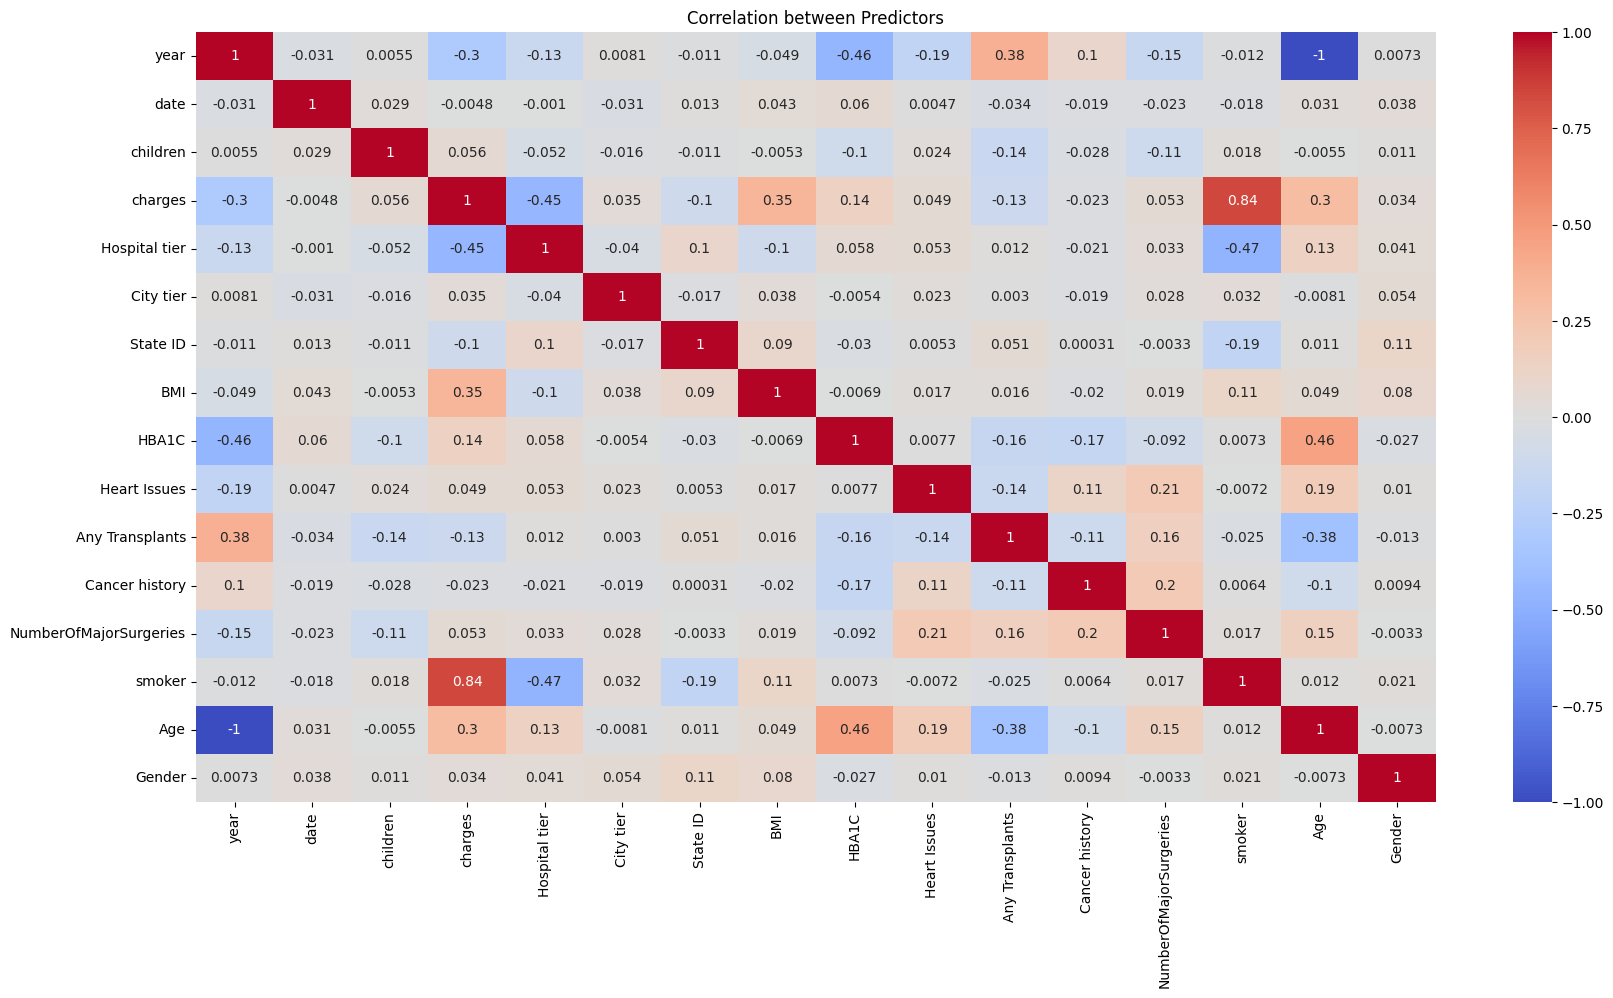

In [ ]:
#1. correlation between predictors to identify highly correlated predictors using heatmap
plt.figure(figsize=(20, 10))
HPD_num = HPD.select_dtypes(include=['int64', 'int32','float64'])
sns.heatmap(HPD_num.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Predictors')
plt.show()

In [ ]:
HPD_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2325 entries, 0 to 2334
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2325 non-null   int64  
 1   date                    2325 non-null   int64  
 2   children                2325 non-null   int64  
 3   charges                 2325 non-null   float64
 4   Hospital tier           2325 non-null   int64  
 5   City tier               2325 non-null   int64  
 6   State ID                2325 non-null   int64  
 7   BMI                     2325 non-null   float64
 8   HBA1C                   2325 non-null   float64
 9   Heart Issues            2325 non-null   int64  
 10  Any Transplants         2325 non-null   int64  
 11  Cancer history          2325 non-null   int64  
 12  NumberOfMajorSurgeries  2325 non-null   int64  
 13  smoker                  2325 non-null   int64  
 14  Age                     2325 non-null   int32

In [ ]:
#2 Linear regression model
# splitting data
X = HPD_num.drop(['charges'], axis=1)
y = HPD_num['charges']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr_scores = cross_val_score(lr, X_train_scaled,y_train,cv=5,scoring='neg_mean_squared_error')
lr_rmse_scores = (-lr_scores)** 0.5


print("Linear Regression RMSE scores : ", lr_rmse_scores)
print("Linear Regression Mean RMSE: ", lr_rmse_scores.mean())

Linear Regression RMSE scores :  [4686.75980033 4622.7933943  3766.20498875 4509.26127366 4244.52535877]
Linear Regression Mean RMSE:  4365.908963162738


In [ ]:
# 2.3. Incorporate sklearn-pipelines to streamline the workflow
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

pipeline = Pipeline([('scaler', StandardScaler()), ('lr', LinearRegression())])

# Use cross_val_score directly on the pipeline
# no need to access best_estimator_
pileline_scores = cross_val_score(pipeline, X_train_scaled,y_train,cv=5, scoring='neg_mean_squared_error')
pipeline_rmse_scores = (-pileline_scores)** 0.5

print("Pipeline RMSE scores :", pipeline_rmse_scores)
print("Pipeline Mean RMSE :", pipeline_rmse_scores.mean()) # calculate the mean of the scores


Pipeline RMSE scores : [4685.02195752 4620.79950571 3768.60060561 4510.43711778 4246.91361594]
Pipeline Mean RMSE : 4366.35456051151


In [ ]:
# 2.4. Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
# define the parameter grid for the search
param_grid = {'alpha': [0.1, 1.0, 10.0]}
ridge_search = GridSearchCV(ridge, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error') # add param_grid to the function call
ridge_search.fit(X_train_scaled,y_train)
ridge_best = ridge_search.best_estimator_
ridge_scores = cross_val_score(ridge_best, X_train_scaled,y_train,cv=5, scoring='neg_mean_squared_error')
ridge_rmse_scores = (-ridge_scores)** 0.5


print("Ridge Regression RMSE scores :", ridge_rmse_scores)
print("Ridge Regression Mean RMSE :", ridge_rmse_scores.mean())


Ridge Regression RMSE scores : [4685.88669691 4624.29681155 3767.02372908 4510.35049453 4245.46935892]
Ridge Regression Mean RMSE : 4366.605418195608


In [ ]:
#2.6. # Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb_scores = cross_val_score(gb, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
gb_rmse_scores = (-gb_scores) ** 0.5

# Fitting the model to get feature importance
gb.fit(X_train_scaled, y_train)
feature_importances = gb.feature_importances_

print("Gradient Boosting RMSE Scores :", gb_rmse_scores)
print("Gradient Boosting Mean RMSE :", gb_rmse_scores.mean())


Gradient Boosting RMSE Scores : [4065.15078199 3782.37764582 2813.63552956 3619.25493273 3440.75012306]
Gradient Boosting Mean RMSE : 3544.233802632848


In [ ]:
# Displaying Feature Importances
FI_df = pd.DataFrame({
    'Feature' : X.columns,
    'Importance' : feature_importances
}).sort_values(by='Importance',ascending=False)

print("Feature Importances:")
print(FI_df)

Feature Importances:
                   Feature  Importance
12                  smoker    0.748868
6                      BMI    0.116665
13                     Age    0.045626
0                     year    0.041586
3            Hospital tier    0.019689
5                 State ID    0.012804
2                 children    0.006998
7                    HBA1C    0.004367
1                     date    0.002030
14                  Gender    0.000910
9          Any Transplants    0.000206
10          Cancer history    0.000117
8             Heart Issues    0.000061
11  NumberOfMajorSurgeries    0.000040
4                City tier    0.000034


In [ ]:
# 3.Estimate the cost of hospitalization of Jaya

# 4. Find the predicted hospitalization cost using the best models
# Ensure jayna_df has the same columns and is in the same order as the data used to fit the scaler
jayna_df = pd.DataFrame({
    'year':[1988],
    'date':[28],
    'children': [2],
    'Hospital tier': [1],
    'City tier': [1],
    'State ID': [1011],
    'BMI': [29.5],
    'HBA1C': [5.8],
    'Heart Issues': [0],
    'Any Transplants': [0],
    'Cancer history': [0],
    'NumberOfMajorSurgeries': [0],
    'smoker': [1],
    'Age': [36],
    'Gender': [0],
})

jayna_df



,year,date,children,Hospital tier,City tier,State ID,BMI,HBA1C,Heart Issues,Any Transplants,Cancer history,NumberOfMajorSurgeries,smoker,Age,Gender
0,1988,28,2,1,1,1011,29.5,5.8,0,0,0,0,1,36,0


In [ ]:
# Standardize the features
jayna_scaled = scaler.transform(jayna_df)

In [ ]:
#4a. predict the cost for Ms. Jayna with linear regression model
# Fit the linear regression model to your training data
lr.fit(X_train_scaled, y_train)

#4a. predict the cost for Ms. Jayna with linear regression model
jayna_pred = lr.predict(jayna_scaled)
print('Linear Regression predicted cost for Ms. Jayna: {}'.format(jayna_pred))


Linear Regression predicted cost for Ms. Jayna: [31300.57197955]


In [ ]:
# Fit the Pipeline model to your training data
pipeline.fit(X_train_scaled, y_train)

#4a. predict the cost for Ms. Jayna with linear regression model
jayna_pred = pipeline.predict(jayna_scaled)
print('Pipeline predicted cost for Ms. Jayna: {}'.format(jayna_pred))


Pipeline predicted cost for Ms. Jayna: [31276.6109398]


In [ ]:
# Fit the ridge model to your training data
ridge_best.fit(X_train_scaled, y_train)

#4a. predict the cost for Ms. Jayna with linear regression model
jayna_pred = ridge_best.predict(jayna_scaled)
print('Ridge predicted cost for Ms. Jayna: {}'.format(jayna_pred))

Ridge predicted cost for Ms. Jayna: [31645.17089963]


In [ ]:

# Fit the gradient boosting model to your training data
gb.fit(X_train_scaled, y_train)

#4a. predict the cost for Ms. Jayna with linear regression model
jayna_pred = gb.predict(jayna_scaled)
print('Gradient Boosting predicted cost for Ms. Jayna: {}'.format(jayna_pred))

Gradient Boosting predicted cost for Ms. Jayna: [28084.37949931]


In [ ]:
# Model evaluation using the Models _ mean_squared, mean_absolute error & r2 score
## a. Linear regression
lr_y_pred = lr.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, lr_y_pred)
Ir_mae = mean_absolute_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)

print('Linear Regression MSE: {}'.format(lr_mse))
print('Linear Regression MAE: {}'.format(Ir_mae))
print('Linear Regression R2: {}'.format(lr_r2))


Linear Regression MSE: 23770878.706275154
Linear Regression MAE: 2953.890141144845
Linear Regression R2: 0.8333530202496859


In [ ]:
## b. Pipeline
pipeline_y_pred = pipeline.predict(X_test_scaled)
pipeline_mse = mean_squared_error(y_test, pipeline_y_pred)
pipeline_mae = mean_absolute_error(y_test, pipeline_y_pred)
pipeline_r2 = r2_score(y_test, pipeline_y_pred)

print('Pipeline MSE: {}'.format(pipeline_mse))
print('Pipeline MAE: {}'.format(pipeline_mae))
print('Pipeline R2: {}'.format(pipeline_r2))


Pipeline MSE: 23768495.16424042
Pipeline MAE: 2951.367299398619
Pipeline R2: 0.8333697301949137


In [ ]:
## c. Ridge
ridge_y_pred = ridge_best.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_mae = mean_absolute_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)

print('Ridge MSE: {}'.format(ridge_mse))
print('Ridge MAE: {}'.format(ridge_mae))
print('Ridge R2: {}'.format(ridge_r2))

Ridge MSE: 23710902.115910128
Ridge MAE: 3016.164259258776
Ridge R2: 0.8337734892514236


In [ ]:
## d. Gradient Boosting
gb_y_pred = gb.predict(X_test_scaled)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

print('Gradient Boosting MSE: {}'.format(gb_mse))
print('Gradient Boosting MAE: {}'.format(gb_mae))
print('Gradient Boosting R2: {}'.format(gb_r2))

Gradient Boosting MSE: 15872846.224732725
Gradient Boosting MAE: 2229.7605474769293
Gradient Boosting R2: 0.8887225871589425


Gradient Boosting has low MSE & high R2.

completed

Conclusion : Gradient boosing is efficient

In [ ]:
# Completed

completed

Completed
